In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from main import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

In [2]:
#lat_lngs and cities
lat_lngs = []
cities = []

#random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [3]:
#lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | monywa
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | fairbanks
Processing Record 9 of Set 1 | manuk mangkaw
Processing Record 10 of Set 1 | shimoda
Processing Record 11 of Set 1 | kuzovatovo
Processing Record 12 of Set 1 | omboue
Processing Record 13 of Set 1 | powell river
Processing Record 14 of Set 1 | victoria
City not found. Skipping...
Processing Record 15 of Set 1 | varberg
Processing Record 16 of Set 1 | aksarka
Processing Record 17 of Set 1 | seoul
Processing Record 18 of Set 1 | baruun-urt
City not found. Skipping...
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | eirunepe
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 o

Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | castrovillari
City not found. Skipping...
Processing Record 39 of Set 4 | esquipulas
Processing Record 40 of Set 4 | pochinki
Processing Record 41 of Set 4 | pravia
Processing Record 42 of Set 4 | basco
Processing Record 43 of Set 4 | tupik
Processing Record 44 of Set 4 | belaya gora
Processing Record 45 of Set 4 | carlyle
Processing Record 46 of Set 4 | fort nelson
Processing Record 47 of Set 4 | kudahuvadhoo
Processing Record 48 of Set 4 | shush
Processing Record 49 of Set 4 | isangel
Processing Record 1 of Set 5 | palmer
Processing Record 2 of Set 5 | lasa
Processing Record 3 of Set 5 | monrovia
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | mahibadhoo
Processing Record 6 of Set 5 | takoradi
Processing Record 7 of Set 5 | carambei
Processing Record 8 of Set 5 | sinnamary
Processing Record 9 of Set 5 | egvekinot
Processing Record 10 of Set 5 | xining
Processing Record 11 of Set 5 | gornozavods

City not found. Skipping...
Processing Record 28 of Set 8 | chara
Processing Record 29 of Set 8 | ust-tsilma
City not found. Skipping...
City not found. Skipping...
Processing Record 30 of Set 8 | moen
Processing Record 31 of Set 8 | margate
Processing Record 32 of Set 8 | swan hill
Processing Record 33 of Set 8 | luba
Processing Record 34 of Set 8 | arti
Processing Record 35 of Set 8 | goderich
Processing Record 36 of Set 8 | komsomolskiy
Processing Record 37 of Set 8 | alakurtti
Processing Record 38 of Set 8 | wanlaweyn
Processing Record 39 of Set 8 | kieta
Processing Record 40 of Set 8 | koutsouras
Processing Record 41 of Set 8 | gigmoto
City not found. Skipping...
Processing Record 42 of Set 8 | klyuchi
Processing Record 43 of Set 8 | asyut
City not found. Skipping...
Processing Record 44 of Set 8 | deputatskiy
Processing Record 45 of Set 8 | aitape
Processing Record 46 of Set 8 | marsabit
Processing Record 47 of Set 8 | sauda
Processing Record 48 of Set 8 | banmankhi
Processing Re

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [8]:
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yellowknife,20,CA,1576106861,67,62.45,-114.38,-20.99,5.82
1,hobart,40,AU,1576106821,58,-42.88,147.33,59.00,18.34
2,port alfred,100,CD,1576106969,72,-7.04,29.76,75.25,12.10
3,busselton,11,AU,1576106808,32,-33.64,115.35,75.99,12.57
4,bredasdorp,51,ZA,1576106813,77,-34.53,20.04,68.00,11.41


In [9]:

weather_dataframe.count()

City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Lat           523
Lng           523
Max Temp      523
Wind Speed    523
dtype: int64

In [10]:
weather_dataframe.head()
weather_dataframe.to_csv("weatherhw.csv")

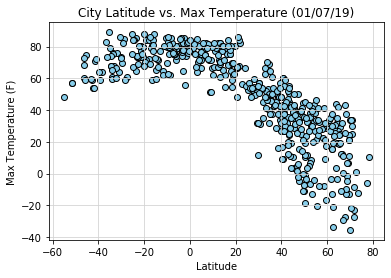

In [11]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure1.png")
plt.show()

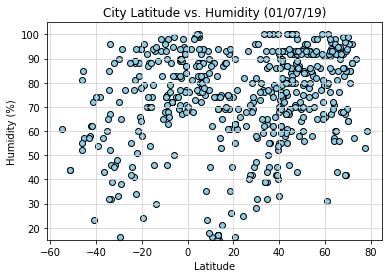

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure2.png")
plt.show()

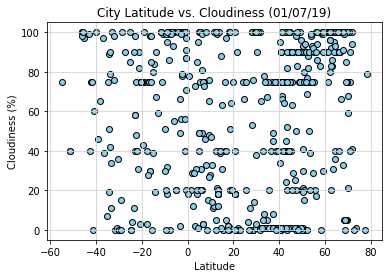

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure3.png")
plt.show()

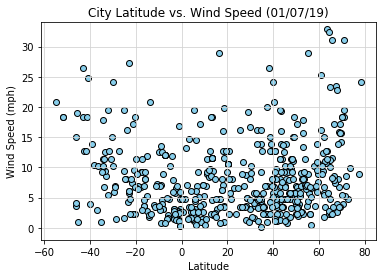

In [14]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figure4.png")
plt.show()